In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
import scipy.constants as const
from numpy.polynomial import Polynomial

In [133]:
#Lines from the excel
VIS_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Visible range\valores_VIS.xlsx")
Spatial_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Spatial range\valores_Spatial.xlsx")


In [134]:
#separate for color range, make a list
values_VIS = [ VIS_data[VIS_data['Lambda observed'].between(3800, 4270, inclusive='neither')],
                VIS_data[VIS_data['Lambda observed'].between(4270, 4760, inclusive='neither')],
                VIS_data[VIS_data['Lambda observed'].between(4760, 4970, inclusive='neither')],
                VIS_data[VIS_data['Lambda observed'].between(4970, 5700, inclusive='neither')],
                VIS_data[VIS_data['Lambda observed'].between(5700, 5810, inclusive='neither')],
                VIS_data[VIS_data['Lambda observed'].between(5810, 6180, inclusive='neither')],
                VIS_data[VIS_data['Lambda observed'].between(6180, 7800, inclusive='neither')],
                VIS_data[VIS_data['Lambda observed'].between(7800, 11000, inclusive='neither')]
]

values_spatial = [Spatial_data[Spatial_data['Lambda observed'].between(3800, 4270, inclusive='neither')],
                Spatial_data[Spatial_data['Lambda observed'].between(4270, 4760, inclusive='neither')],
                Spatial_data[Spatial_data['Lambda observed'].between(4760, 4970, inclusive='neither')],
                Spatial_data[Spatial_data['Lambda observed'].between(4970, 5700, inclusive='neither')],
                Spatial_data[Spatial_data['Lambda observed'].between(5700, 5810, inclusive='neither')],
                Spatial_data[Spatial_data['Lambda observed'].between(5810, 6180, inclusive='neither')],
                Spatial_data[Spatial_data['Lambda observed'].between(6180, 7800, inclusive='neither')],
                Spatial_data[Spatial_data['Lambda observed'].between(7800, 11000, inclusive='neither')]
]

In [135]:
#colors for the plot
colors = ['violet','blue','cyan','green','yellow','orange','red','brown']
colors_fit = ['darkviolet','darkblue','darkcyan','darkgreen','gold','darkorange','darkred','sienna']

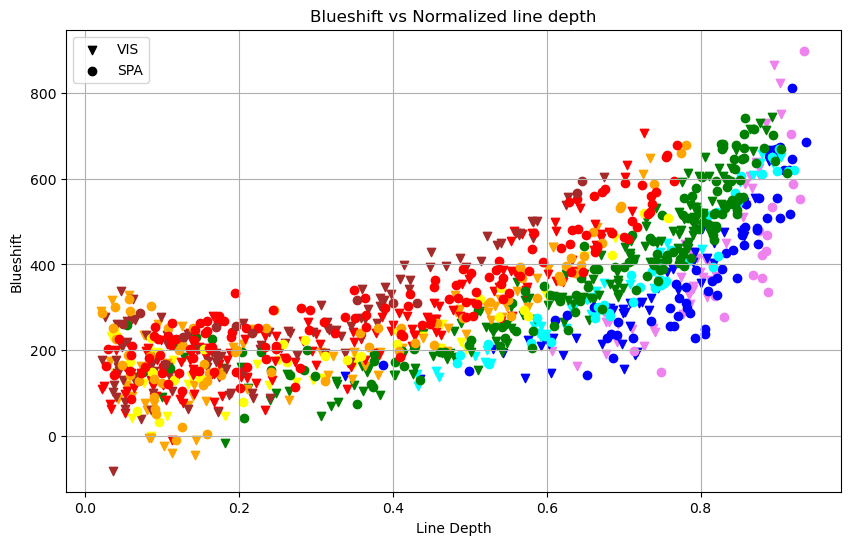

In [136]:
#Granulation pattern
fig8, ax = plt.subplots(1,1,figsize=(10,6))

for i in range(0,len(values_VIS)):  
    ax.scatter(1-values_VIS[i]['Flux'],values_VIS[i]['Blueshift'], color=colors[i],marker='v')

for i in range(0,len(values_spatial)):  
    ax.scatter(1-values_spatial[i]['Flux'],values_spatial[i]['Blueshift'], color=colors[i],marker='o')

#For the legend
ax.scatter([],[],marker='v',color='k',label='VIS')
ax.scatter([],[],marker='o',color='k',label='SPA')

ax.set_title('Blueshift vs Normalized line depth')
ax.set_xlabel(r'Line Depth')
ax.set_ylabel(r'Blueshift')
ax.legend()
ax.grid()
# fig8.savefig('Blueshift.png')

Follow the characterization that made Ellwarth for both data I fit an second order polynomial fit.

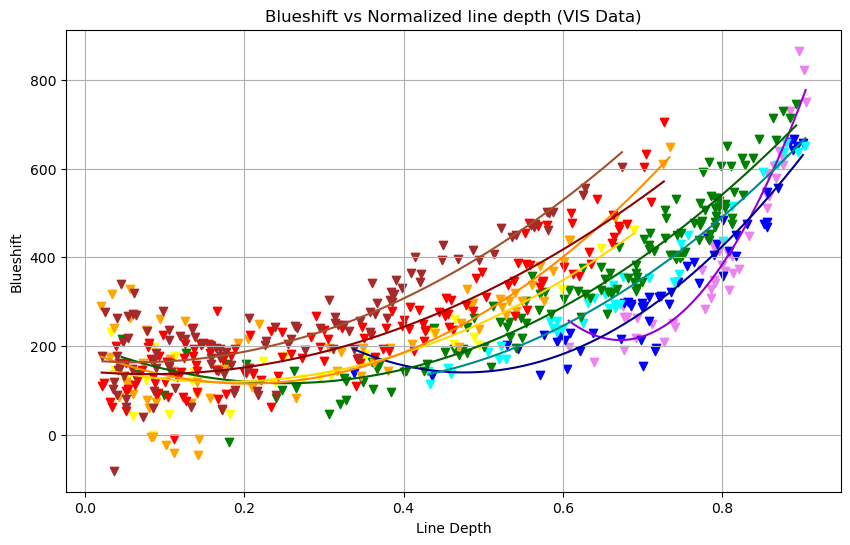

In [154]:
#Values for the weigthed average
param_VIS = []
fit_VIS= []
#Granulation pattern
fig9, ax = plt.subplots(1,1,figsize=(10,6))

for i in range(0,len(values_VIS)):  
    
    pol = Polynomial.fit(1-values_VIS[i]['Flux'], values_VIS[i]['Blueshift'], 2)
    param = pol.convert().coef
    values_flux = np.linspace(min(1-values_VIS[i]['Flux']), max(1-values_VIS[i]['Flux']), len(1-values_VIS[i]['Flux']))
    flux_fit = poly.polyval(values_flux,param)

    ax.plot(values_flux,flux_fit, color=colors_fit[i])
    ax.scatter(1-values_VIS[i]['Flux'],values_VIS[i]['Blueshift'], color=colors[i],marker='v')

    param_VIS.append(pd.DataFrame(param))
    fit_VIS.append(flux_fit)

ax.set_title('Blueshift vs Normalized line depth (VIS Data)')
ax.set_xlabel(r'Line Depth')
ax.set_ylabel(r'Blueshift')
ax.grid()
# fig9.savefig('Characterization_VIS.png')

In [181]:
#Calculate te average and show the parameters
parameters_VIS = pd.concat(param_VIS,axis=1)
parameters_VIS = parameters_VIS.set_axis(colors, axis=1)

parameters_VIS

,violet,blue,cyan,green,yellow,orange,red,brown
0,4924.205256,757.096602,263.343534,204.879875,155.980681,190.192763,142.964850,168.346633
1,-14022.706361,-2590.735673,-974.510908,-709.607005,-432.949509,-739.924830,-166.150359,-162.246893
2,10434.978277,2719.884050,1574.359799,1413.546014,1256.076020,1818.162629,1039.856131,1273.011937


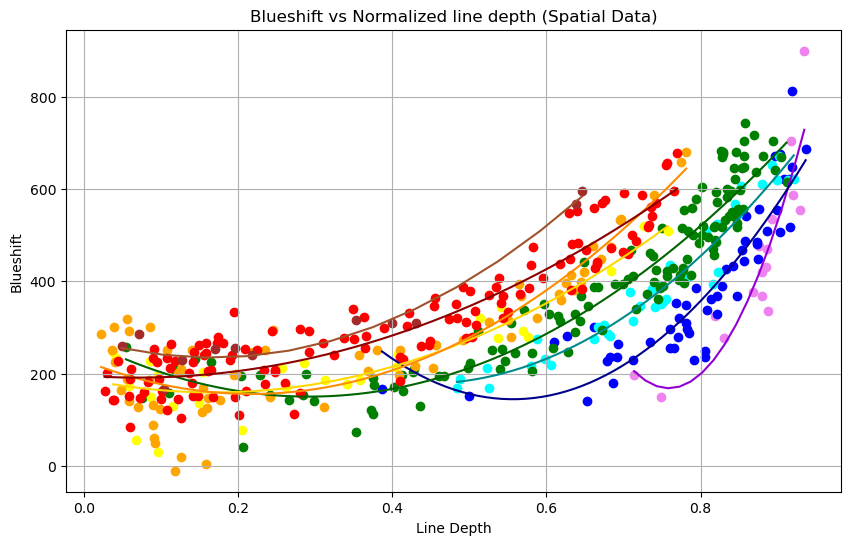

In [156]:
#Values for the weigthed average
param_spatial = []
fit_SPA = []
#Granulation pattern
fig9, ax = plt.subplots(1,1,figsize=(10,6))

for i in range(0,len(values_spatial)):  
    
    pol = Polynomial.fit(1-values_spatial[i]['Flux'], values_spatial[i]['Blueshift'], 2)
    param = pol.convert().coef
    values_flux = np.linspace(min(1-values_spatial[i]['Flux']), max(1-values_spatial[i]['Flux']), len(1-values_spatial[i]['Flux']))
    flux_fit = poly.polyval(values_flux,param)

    ax.plot(values_flux,flux_fit, color=colors_fit[i])
    ax.scatter(1-values_spatial[i]['Flux'],values_spatial[i]['Blueshift'], color=colors[i],marker='o')

    param_spatial.append(pd.DataFrame(param))
    fit_SPA.append(flux_fit)

ax.set_title('Blueshift vs Normalized line depth (Spatial Data)')
ax.set_xlabel(r'Line Depth')
ax.set_ylabel(r'Blueshift')
ax.grid()
# fig9.savefig('Characterization_SPA.png')

In [157]:
#Calculate te average and show the parameters
parameters_spatial = pd.concat(param_spatial,axis=1)
parameters_spatial = parameters_spatial.set_axis(colors, axis=1)
parameters_spatial = parameters_spatial.T.set_axis(['ax^2','bx','c'],axis=1)

parameters_spatial

,ax^2,bx,c
violet,10599.620709,-27487.902370,18109.135055
blue,1254.213699,-3986.754745,3582.032288
cyan,598.148587,-1899.779770,2150.366536
green,272.301311,-834.576136,1430.312726
yellow,188.833536,-348.547495,1036.116392
orange,228.526058,-665.028627,1531.184313
red,195.708702,-115.570313,833.207629
brown,276.610916,-501.652587,1511.339241


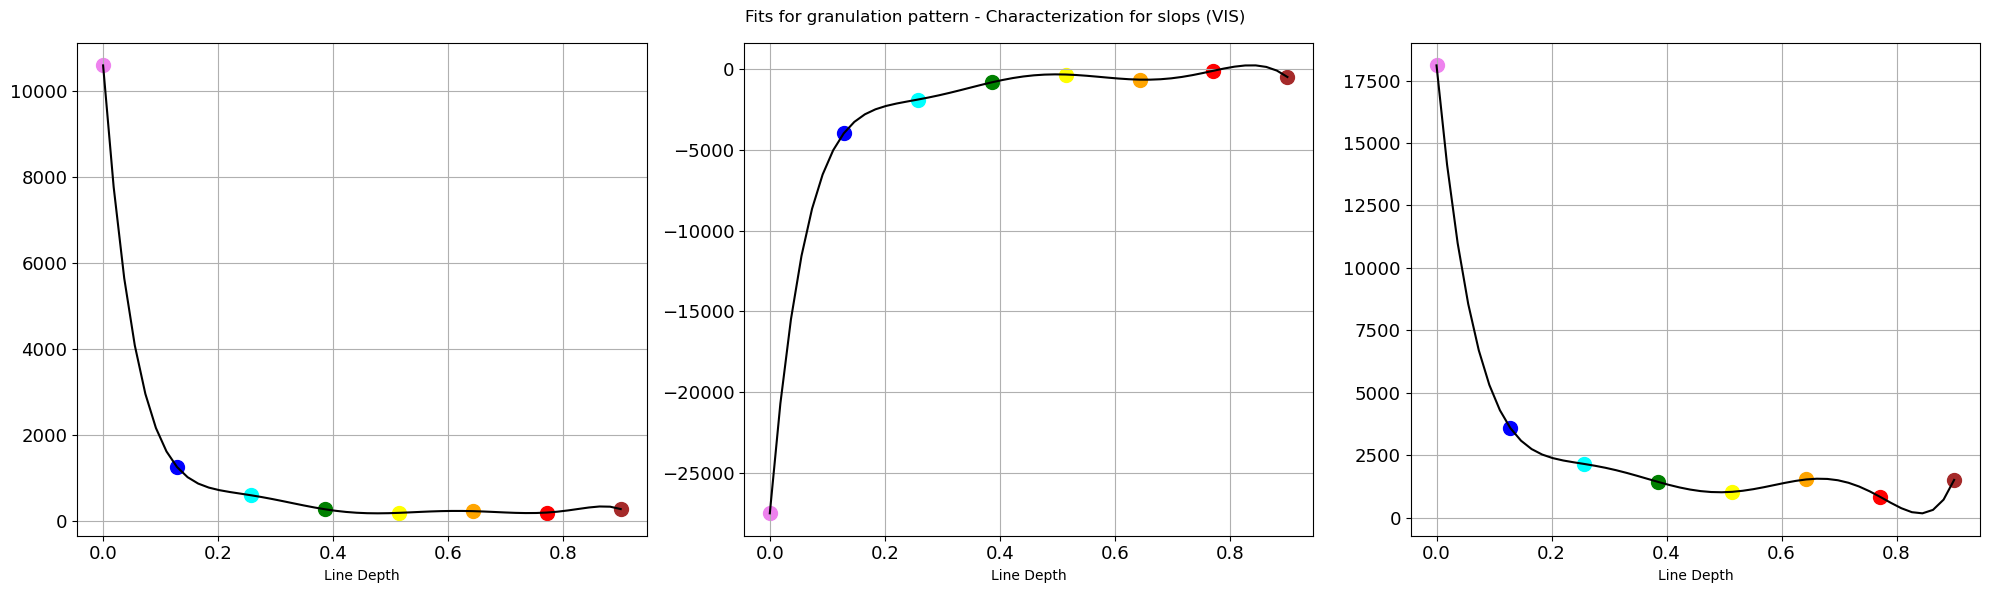

In [ ]:
#Made an interpolation
def Lagrange(x,xi,j):
    prod = 1.0
    n = len(xi)
    for i in range(n):
        if i != j:
            prod *= (x - xi[i])/(xi[j]-xi[i])
            
    return prod

def Interpolate(x,xi,yi):
    Sum = 0.
    n = len(xi)
    for j in range(n):
        Sum += yi.iloc[j]*Lagrange(x,xi,j)
        
    return Sum

inter_data_2 = Interpolate(np.linspace(0,0.9,50),values_flux,parameters_spatial['ax^2'])
inter_data_1 = Interpolate(np.linspace(0,0.9,50),values_flux,parameters_spatial['bx'])
inter_data_0 = Interpolate(np.linspace(0,0.9,50),values_flux,parameters_spatial['c'])

#Plot of raw data
fig1, axis1 = plt.subplots(1,3, figsize = (20, 6))
ax1 = axis1[0]
ax2 = axis1[1]
ax3 = axis1[2]

fig1.suptitle(r'Fits for granulation pattern - Characterization for slops (VIS)')

for i in range(0,len(parameters_spatial['ax^2'])):

    ax1.scatter(values_flux[i],parameters_spatial['ax^2'].iloc[i],color= colors[i],s=100)
    ax2.scatter(values_flux[i],parameters_spatial['bx'].iloc[i],color= colors[i],s=100)
    ax3.scatter(values_flux[i],parameters_spatial['c'].iloc[i],color= colors[i],s=100)

ax1.plot(np.linspace(0,0.9,50),inter_data_2,color='k')
ax1.set_xlabel(r'Line Depth')
ax1.grid()
ax1.tick_params(axis='both',labelsize=13)

ax2.plot(np.linspace(0,0.9,50),inter_data_1,color='k')
ax2.set_xlabel(r'Line Depth')
ax2.grid()
ax2.tick_params(axis='both',labelsize=13)

ax3.plot(np.linspace(0,0.9,50),inter_data_0,color='k')
ax3.set_xlabel(r'Line Depth')
ax3.grid()
ax3.tick_params(axis='both',labelsize=13)

fig1.tight_layout()

#Tiene cara de logaritmo

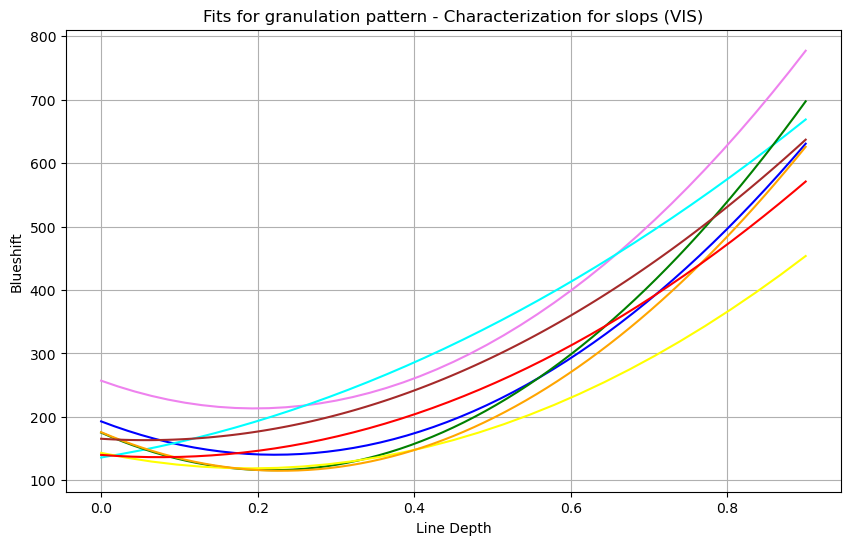

In [183]:
#Characterization
fig11, ax = plt.subplots(1,1,figsize=(10,6))

for i in range(0,len(fit_VIS)): 
    values_flux = np.linspace(0,0.9, len(fit_VIS[i])) 
    ax.plot(values_flux,fit_VIS[i],color= colors[i])

ax.set_title('Fits for granulation pattern - Characterization for slops (VIS)')
ax.set_xlabel(r'Line Depth')
ax.set_ylabel(r'Blueshift')
ax.grid()
# # fig8.savefig('Blueshift.png')


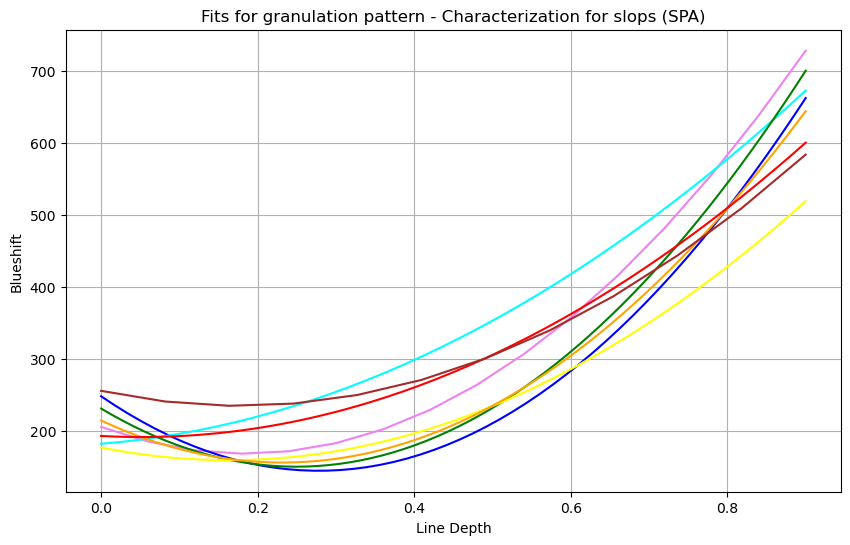

In [159]:
#Characterization
fig11, ax = plt.subplots(1,1,figsize=(10,6))

for i in range(0,len(fit_SPA)): 
    values_flux = np.linspace(0,0.9, len(fit_SPA[i])) 
    ax.plot(values_flux,fit_SPA[i],color= colors[i])

ax.set_title('Fits for granulation pattern - Characterization for slops (SPA)')
ax.set_xlabel(r'Line Depth')
ax.set_ylabel(r'Blueshift')
ax.grid()
# # fig8.savefig('Blueshift.png')
